In [1]:
#!pip install fastlmm
#!pip install argparse
#!pip install six
#!pip install msrest
#!pip install -U turicreate

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import turicreate as tc

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#dataframes:
ratings = pd.read_csv('ratingClean.csv')#.sample(n=10)
users = pd.read_csv('userClean.csv')
restaurants = pd.read_csv('restaurantClean.csv')

In [4]:
common = ['latitude','longitude','American_Express','MasterCard-Eurocard','VISA','bank_debit_cards',
          'cash','AFRICA','ASIA','EU','NA','LA','ONEKIND','OTHER','DRINK','smoker','dress_preference',
          'transport','hijos','budget', 'userID_auto']

onlyUser = ['userID','ambience','marital_status','birth_year','interest','personality','religion',
            'activity','color','weight','height','age','userID_auto']

onlyRest = ['placeID','Carte_Blanche','Diners_Club','Discover','Japan_Credit_Bureau','checks',
            'gift_certificates','city','state','country','fax','zip','accessibility','url','franchise',
            'ar_services','placeID_auto']
users = users[common]
common[-1] = 'placeID_auto'
restaurants = restaurants[common]

allData = pd.merge(ratings, users, on='userID_auto', how='outer')
allData = pd.merge(allData, restaurants, on='placeID_auto', how='outer')
allData.drop(['userID','placeID'], axis=1, inplace=True)
#users.fillna(0, inplace=True)
#restaurants.fillna(0, inplace=True)

In [5]:
ratings.info()
ratings.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 7 columns):
userID            1161 non-null object
placeID           1161 non-null int64
rating            1161 non-null int64
food_rating       1161 non-null int64
service_rating    1161 non-null int64
userID_auto       1161 non-null int64
placeID_auto      1161 non-null int64
dtypes: int64(6), object(1)
memory usage: 63.6+ KB


,userID,placeID,rating,food_rating,service_rating,userID_auto,placeID_auto
0,U1077,135085,2,2,2,76,123
1,U1077,135038,2,2,1,76,84
2,U1077,132825,2,2,2,76,31


In [6]:
users.info()
users.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 21 columns):
latitude               138 non-null float64
longitude              138 non-null float64
American_Express       133 non-null float64
MasterCard-Eurocard    133 non-null float64
VISA                   133 non-null float64
bank_debit_cards       133 non-null float64
cash                   133 non-null float64
AFRICA                 138 non-null int64
ASIA                   138 non-null int64
EU                     138 non-null int64
NA                     138 non-null int64
LA                     138 non-null int64
ONEKIND                138 non-null int64
OTHER                  138 non-null int64
DRINK                  138 non-null int64
smoker                 138 non-null int64
dress_preference       138 non-null int64
transport              138 non-null int64
hijos                  138 non-null int64
budget                 138 non-null int64
userID_auto            138 non-null int64

,latitude,longitude,American_Express,MasterCard-Eurocard,VISA,bank_debit_cards,cash,AFRICA,ASIA,EU,...,LA,ONEKIND,OTHER,DRINK,smoker,dress_preference,transport,hijos,budget,userID_auto
0,22.139997,-100.978803,0.0,0.0,0.0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,22.150087,-100.983325,0.0,0.0,0.0,0.0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,22.119847,-100.946527,0.0,0.0,0.0,0.0,1.0,0,0,0,...,1,0,0,0,0,2,0,0,0,2


In [7]:
restaurants.info()
restaurants.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 21 columns):
latitude               130 non-null float64
longitude              130 non-null float64
American_Express       615 non-null float64
MasterCard-Eurocard    615 non-null float64
VISA                   615 non-null float64
bank_debit_cards       615 non-null float64
cash                   615 non-null float64
AFRICA                 769 non-null float64
ASIA                   769 non-null float64
EU                     769 non-null float64
NA                     769 non-null float64
LA                     769 non-null float64
ONEKIND                769 non-null float64
OTHER                  769 non-null float64
DRINK                  769 non-null float64
smoker                 130 non-null float64
dress_preference       130 non-null float64
transport              675 non-null float64
hijos                  130 non-null float64
budget                 130 non-null float64
placeID_auto   

,latitude,longitude,American_Express,MasterCard-Eurocard,VISA,bank_debit_cards,cash,AFRICA,ASIA,EU,...,LA,ONEKIND,OTHER,DRINK,smoker,dress_preference,transport,hijos,budget,placeID_auto
0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,10
2,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,17


In [8]:
allData.info()
allData.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1964
Data columns (total 45 columns):
rating                   1161 non-null float64
food_rating              1161 non-null float64
service_rating           1161 non-null float64
userID_auto              1161 non-null float64
placeID_auto             1965 non-null int64
latitude_x               1161 non-null float64
longitude_x              1161 non-null float64
American_Express_x       1107 non-null float64
MasterCard-Eurocard_x    1107 non-null float64
VISA_x                   1107 non-null float64
bank_debit_cards_x       1107 non-null float64
cash_x                   1107 non-null float64
AFRICA_x                 1161 non-null float64
ASIA_x                   1161 non-null float64
EU_x                     1161 non-null float64
NA_x                     1161 non-null float64
LA_x                     1161 non-null float64
ONEKIND_x                1161 non-null float64
OTHER_x                  1161 non-null float64
DR

,rating,food_rating,service_rating,userID_auto,placeID_auto,latitude_x,longitude_x,American_Express_x,MasterCard-Eurocard_x,VISA_x,...,NA_y,LA_y,ONEKIND_y,OTHER_y,DRINK_y,smoker_y,dress_preference_y,transport_y,hijos_y,budget_y
0,2.0,2.0,2.0,76.0,123,22.156469,-100.985540,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,NaN,NaN
1,1.0,2.0,1.0,107.0,123,22.143524,-100.987562,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,NaN,NaN
2,1.0,2.0,1.0,80.0,123,22.207749,-100.942383,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,NaN,NaN


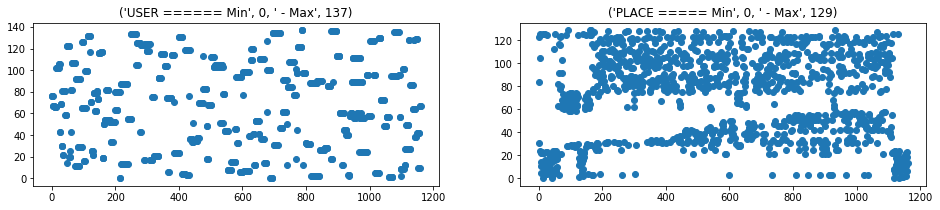

In [9]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
aux = ratings['userID_auto']
cad = 'USER ====== Min',aux.min(),' - Max',aux.max()
plt.title(cad)
plt.scatter(np.arange(0,len(aux)),aux)
plt.subplot(1,2,2)
aux = ratings['placeID_auto']
cad = 'PLACE ===== Min',aux.min(),' - Max',aux.max()
plt.title(cad)
plt.scatter(np.arange(0,len(aux)),aux)
plt.show()

# Collaborative filtering model

In [10]:
# sklearn function for calculate pair distances
#   posible metrics: cosine, euclidean or Pearson correlation
from sklearn.metrics.pairwise import pairwise_distances

In [11]:
n_users = ratings.userID_auto.max()
n_items = ratings.placeID_auto.max()

In [12]:
cbMatrix = np.zeros((n_users, n_items))
for line in ratings.itertuples():
    cbMatrix[line[6]-1, line[7]-1] = line[3]

### User-User filtering

In [13]:
user_similarity = pairwise_distances(cbMatrix, metric='cosine')
mean_user_rating = cbMatrix.mean(axis=1)
ratings_diff = (cbMatrix - mean_user_rating[:, np.newaxis])
user_prediction = mean_user_rating[:, np.newaxis] + np.dot(user_similarity, ratings_diff) / np.array([np.abs(user_similarity).sum(axis=1)]).T

In [14]:
#a = user_prediction.max(axis=1)
#a

### Item-Item filtering

In [15]:
item_similarity = pairwise_distances(cbMatrix.T, metric='cosine')
item_prediction = np.dot(cbMatrix,item_similarity) / np.array([np.abs(item_similarity).sum(axis=1)])

# Collaborative filtering model with Turicreate

In [16]:
aux = allData.copy()#ratings[['userID_auto', 'placeID_auto', 'rating', 'food_rating', 'service_rating']].copy()#.head(10).copy()
msk = np.random.random(len(aux)) < .7
train = tc.SFrame(aux[msk])
test = tc.SFrame(aux[~msk])

In [17]:
m1 = tc.ranking_factorization_recommender.create(train, 
                                                 user_id='userID_auto', 
                                                 item_id='placeID_auto', 
                                                 target='rating',
                                                 verbose=False)
m2 = tc.ranking_factorization_recommender.create(train, 
                                                 user_id='userID_auto', 
                                                 item_id='placeID_auto', 
                                                 target='rating', 
                                                 verbose=False,
                                                 user_data = tc.SFrame(users), 
                                                 item_data = tc.SFrame(restaurants))

Recsys training: model = ranking_factorization_recommender

[ERROR] turicreate.toolkits._main: Toolkit error: Column 'userID_auto' has type float; cannot be treated as categorical.


ToolkitError: Column 'userID_auto' has type float; cannot be treated as categorical.

In [ ]:
print('--------------------MODEL 1-----------------------------')
em1 = m1.evaluate(test, verbose=False)
print(em1.get('rmse_overall'))
print(em1.get('precision_recall_overall').print_rows(num_rows=10))
print('--------------------MODEL 2-----------------------------')
em2 = m2.evaluate(test, verbose=False)
print(em2.get('rmse_overall'))
print(em2.get('precision_recall_overall').print_rows(num_rows=10))

In [ ]:
print(em1.keys())

In [ ]:
#recommendations = m.recommend()
recommendations = m1.recommend(users=[10], k=3)
recommendations['score'] = recommendations['score']
recommendations

In [ ]:
recommendations = m2.recommend(users=[10], k=3)
recommendations['score'] = recommendations['score']
recommendations

In [ ]:
5+5